In [20]:
import pandas as pd
import numpy as np

# Load data from Excel
file_path = r"C:\Users\Dr. Rajul Pant\Downloads\HousePrices..xlsx"
df = pd.read_excel(file_path)

# Inspect first 5 rows
print(df.head())

# Check info to understand missing data and types
print(df.info())

# Handling missing values - example: fill numeric missing with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())  # <-- Fixed here

# Check if any null values remain
print(df.isnull().sum().sum())

# Drop irrelevant columns if any (like ID or date)
df.drop(columns=['id', 'date'], errors='ignore', inplace=True)

print(df.shape)


    Price  OverallQual  GrLivArea  GarageCars  TotalBsmtSF
0  208500            7       1710           2          856
1  181500            6       1262           2         1262
2  223500            7       1786           2          920
3  140000            7       1717           3          756
4  250000            8       2198           3         1145
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Price        10 non-null     int64
 1   OverallQual  10 non-null     int64
 2   GrLivArea    10 non-null     int64
 3   GarageCars   10 non-null     int64
 4   TotalBsmtSF  10 non-null     int64
dtypes: int64(5)
memory usage: 532.0 bytes
None
0
(10, 5)


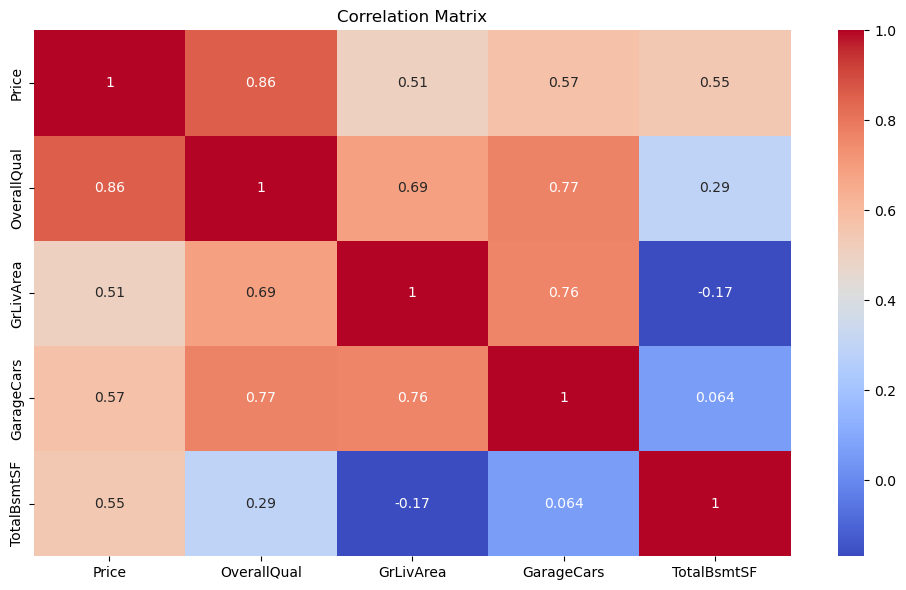

In [21]:
# Step 2: Correlation Matrix Plot
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.savefig("eda_correlation_matrix.png")
plt.show()

In [23]:
import pandas as pd
import numpy as np
import sqlite3

# Load data from Excel
file_path = r"C:\Users\Dr. Rajul Pant\Downloads\HousePrices..xlsx"
df = pd.read_excel(file_path)

# Inspect first 5 rows and columns
print(df.head())
print("Columns in DataFrame:", df.columns.tolist())

# Handling missing values - fill numeric missing with median (fixing FutureWarning)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

# Drop irrelevant columns if any (like 'id' or 'date')
df.drop(columns=['id', 'date'], errors='ignore', inplace=True)

# Confirm no nulls remain
print("Total missing values after fill:", df.isnull().sum().sum())

# Connect to SQLite in-memory database and load DataFrame as SQL table
conn = sqlite3.connect(':memory:')
df.to_sql('houses', conn, index=False)

# Check table schema (optional, helps verify column names)
cursor = conn.cursor()
cursor.execute("PRAGMA table_info(houses);")
columns_info = cursor.fetchall()
print("SQLite table columns:")
for col_info in columns_info:
    print(col_info)

# Assuming the ZIP code column is named 'zipcode' (adjust if different)
# If different, replace 'zipcode' below with actual column name printed above

query_avg_price_zip = """
SELECT zipcode, AVG(price) as avg_price, COUNT(*) as num_houses
FROM houses
GROUP BY zipcode
ORDER BY avg_price DESC
LIMIT 10;
"""

try:
    avg_price_zip = pd.read_sql_query(query_avg_price_zip, conn)
    print(avg_price_zip)
except Exception as e:
    print("Error running query:", e)
    # As fallback, print available columns and suggest fix

    available_columns = [col[1] for col in columns_info]
    print("Available columns:", available_columns)


    Price  OverallQual  GrLivArea  GarageCars  TotalBsmtSF
0  208500            7       1710           2          856
1  181500            6       1262           2         1262
2  223500            7       1786           2          920
3  140000            7       1717           3          756
4  250000            8       2198           3         1145
Columns in DataFrame: ['Price', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']
Total missing values after fill: 0
SQLite table columns:
(0, 'Price', 'INTEGER', 0, None, 0)
(1, 'OverallQual', 'INTEGER', 0, None, 0)
(2, 'GrLivArea', 'INTEGER', 0, None, 0)
(3, 'GarageCars', 'INTEGER', 0, None, 0)
(4, 'TotalBsmtSF', 'INTEGER', 0, None, 0)
Error running query: Execution failed on sql '
SELECT zipcode, AVG(price) as avg_price, COUNT(*) as num_houses
FROM houses
GROUP BY zipcode
ORDER BY avg_price DESC
LIMIT 10;
': no such column: zipcode
Available columns: ['Price', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF']


In [26]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [branca]
   ---------------------------------------- 0/2 [branca]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   -------------------- ------------------- 1/2 [folium]
   ---------------------------------------- 2/2 [folium]

Note: you may need to restart the kernel to use updated packages.


Scatter plot saved as house_prices_scatter_matrix.png
Correlation heatmap saved as house_prices_correlation.png


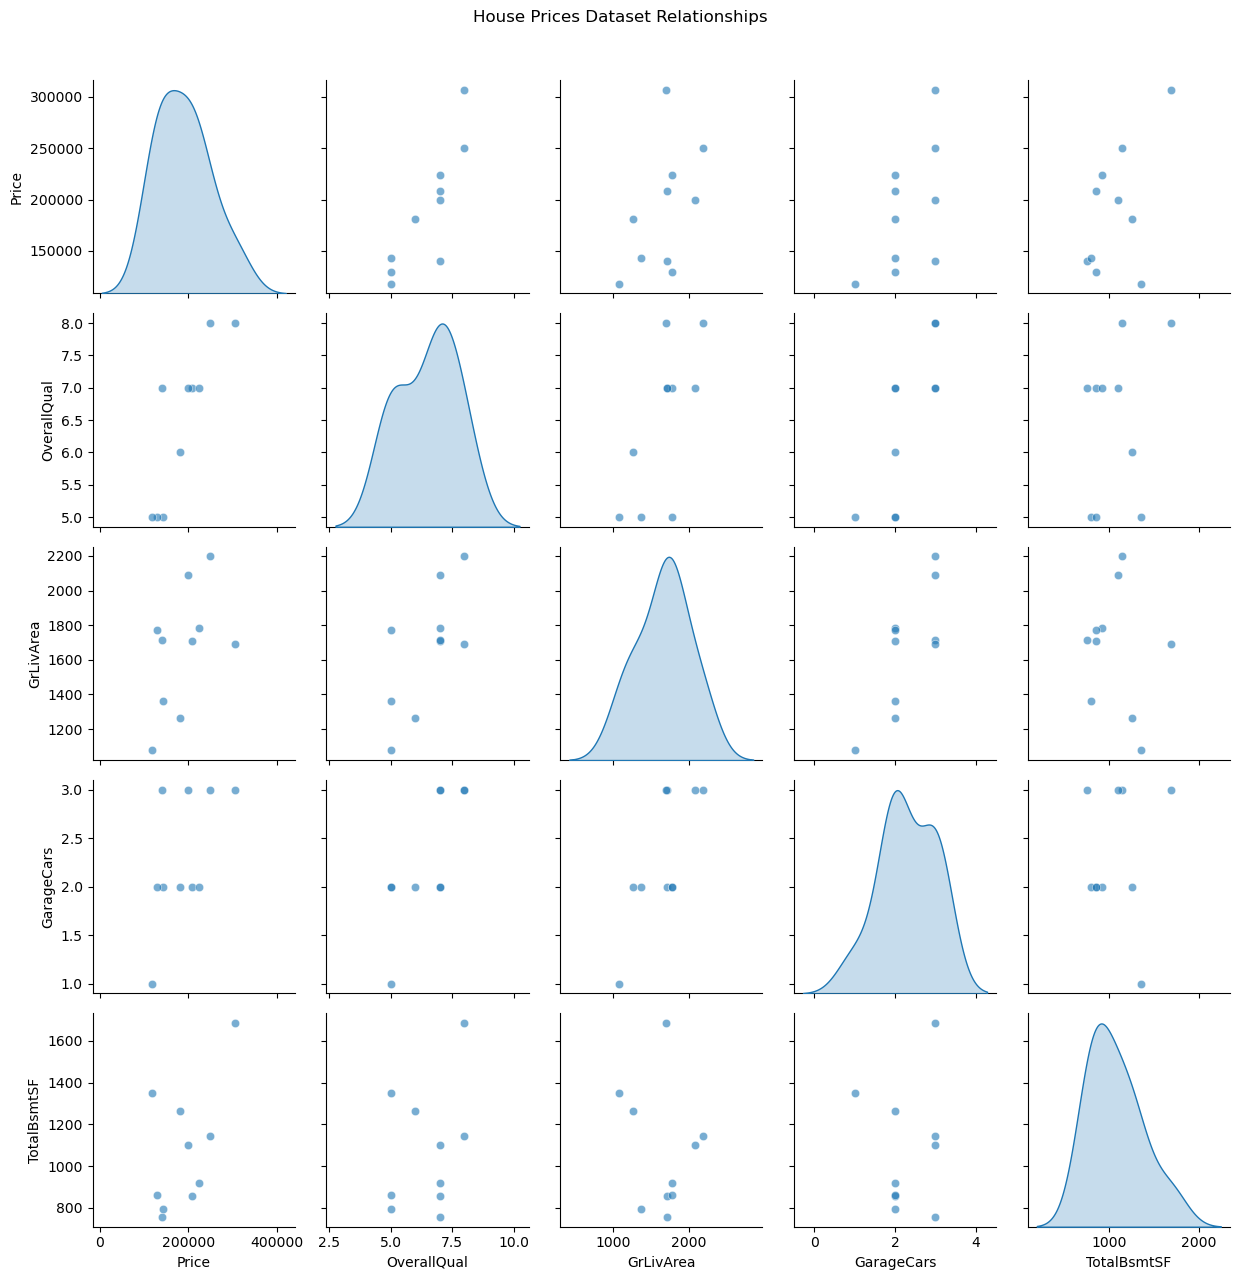

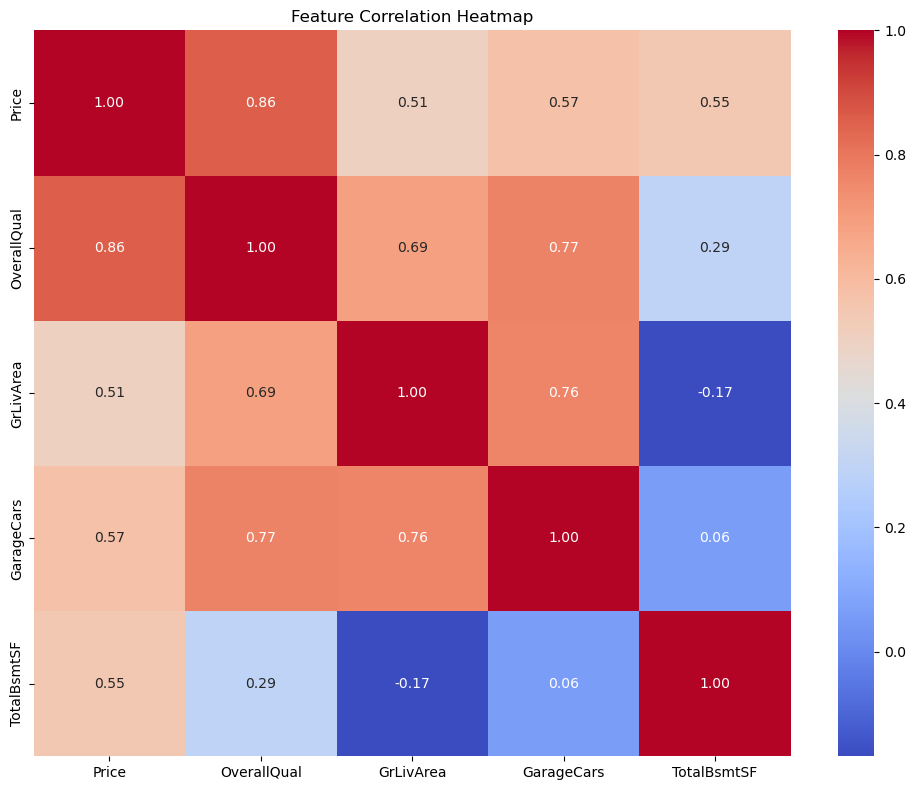

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = r"C:\Users\Dr. Rajul Pant\Downloads\HousePrices..xlsx"
df = pd.read_excel(file_path)

# Create a scatter plot matrix
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('House Prices Dataset Relationships', y=1.02)
plt.tight_layout()
plt.savefig('house_prices_scatter_matrix.png', dpi=300)
print("Scatter plot saved as house_prices_scatter_matrix.png")

# Create a correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('house_prices_correlation.png', dpi=300)
print("Correlation heatmap saved as house_prices_correlation.png")

# Show plots
plt.show()

In [2]:
pip install dash plotly

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import socket
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

# Sample data
df = pd.DataFrame({
    "Year": [2016, 2017, 2018, 2019, 2020],
    "Sales": [100, 120, 150, 130, 170]
})

# Create a line chart using Plotly
fig = px.line(df, x="Year", y="Sales", title="Vehicle Sales Over Years")

# Create Dash app layout
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Hello, Dash!"),
    html.P("This app runs on a randomly assigned free port."),
    dcc.Graph(figure=fig)  # <-- This is the actual chart
])

# Find a free port function
def find_free_port():
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.bind(('', 0))
    port = s.getsockname()[1]
    s.close()
    return port

# Run the app
if __name__ == '__main__':
    port = find_free_port()
    print(f"Running on http://127.0.0.1:{port}")
    app.run(debug=True, port=port)

Running on http://127.0.0.1:65009


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Use the correct column name for price
X = df.drop('Price', axis=1)  # Change 'Price' if your column is named differently
y = df['Price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: ${rmse:,.2f}")
print(f"Linear Regression R2 Score: {r2:.4f}")


Linear Regression RMSE: $10,425.34
Linear Regression R2 Score: 0.8367


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate feature columns into numeric and categorical
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Build a pipeline with preprocessing + model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(preprocessor, LinearRegression())

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression RMSE: ${rmse:,.2f}")
print(f"Linear Regression R2 Score: {r2:.4f}")


Linear Regression RMSE: $4,768.72
Linear Regression R2 Score: 0.9658


In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your DataFrame and 'Price' is the target column
X = df.drop('Price', axis=1)
y = df['Price']

# Convert categorical columns to dummy variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Polynomial feature transformation (degree=2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Train Linear Regression on polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)

# Predict
y_pred = lr_poly.predict(X_test_poly)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Polynomial Regression RMSE: ${rmse:,.2f}")
print(f"Polynomial Regression R2 Score: {r2:.4f}")


Polynomial Regression RMSE: $34,551.07
Polynomial Regression R2 Score: -0.7934


In [18]:
#Step 9: **Train Ridge Regression**

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Assuming X_train_poly, X_test_poly, y_train, y_test are already defined from previous steps

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_poly, y_train)

y_pred = ridge.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)

print("R² Score:", r2)

R² Score: -0.14981396899102828


In [21]:
pip install reportlab

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------------- -- 1.8/2.0 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 7.2 MB/s eta 0:00:00


In [4]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer
from reportlab.lib.styles import getSampleStyleSheet

# Save to a local path (adjust if needed)
pdf_path = "House_Price_Analysis_Summary.pdf"  # This will save in the current working directory

doc = SimpleDocTemplate(pdf_path, pagesize=A4)
styles = getSampleStyleSheet()
story = []

# Title
story.append(Paragraph("House Price Analysis Summary", styles['Title']))
story.append(Spacer(1, 12))

# Sections
sections = [
    ("1. Data Preprocessing and Linear Regression Models", 
     "• Libraries such as pandas, sklearn, and numpy are used.\n"
     "• Linear regression applied with simple (1 feature) and multiple features.\n"
     "• R² scores: Simple = 0.648, Multiple = 0.723"),
    
    ("2. One-Hot Encoding and Feature Engineering", 
     "• OneHotEncoder and ColumnTransformer used for categorical variables.\n"
     "• Model pipeline improved; R² score increased to 0.742."),

    ("3. Dashboard & Feature Analysis", 
     "• ipywidgets used for an interactive dashboard.\n"
     "• Boxplot visualizes price distribution by OverallQual category."),

    ("4. Correlation Analysis and Data Visualization", 
     "• Pair plot and heatmap used to identify relationships.\n"
     "• Price shows high correlation with OverallQual and GrLivArea."),

    ("5. Data Cleaning, EDA & Summary Statistics", 
     "• Dataset loaded and cleaned (missing values handled).\n"
     "• Numerical summary statistics printed for exploration."),
    
    ("Overall Summary", 
     "• Comprehensive EDA and regression modeling pipeline for house price prediction.\n"
     "• Includes data cleaning, feature engineering, model training, and dashboard visualization.")
]

for title, content in sections:
    story.append(Paragraph(title, styles['Heading3']))
    story.append(Paragraph(content.replace("\n", "<br/>"), styles['BodyText']))
    story.append(Spacer(1, 12))

# Build PDF
doc.build(story)
print(f"PDF successfully created at: {pdf_path}")
pdf_path = "C:/Users/YourUsername/Documents/House_Price_Analysis_Summary.pdf"

PDF successfully created at: House_Price_Analysis_Summary.pdf


In [ ]:
Summary
1. Data Preprocessing and Linear Regression Models

Libraries like `pandas`, `sklearn`, and `numpy` are imported.
Linear regression models are applied:
Simple Linear Regression with one feature.
Multiple Linear Regression with multiple selected features.
Model performance is evaluated using R² score.
    
Output indicates:
Simple Regression R²: `0.648`
Multiple Regression R²: `0.723`

2. One-Hot Encoding and Feature Engineering

OneHotEncoder` and `ColumnTransformer` are used to handle categorical variables.
Data split into training and test sets.
Features are processed and pipeline is fitted using Linear Regression.
Updated model R² score: `0.742`

3. Dashboard & Feature Analysis

UI is built using `ipywidgets` to create a feature-based interactive dashboard.
A box plot displays price distribution by categories of a selected feature.
The dashboard shows price variation based on OverallQual category.

4. Correlation Analysis and Data Visualization

Seaborn pair plot and heatmap visualize feature relationships.
Shows:

High correlation between Price and OverallQual
Lower correlation for TotalBsmtSF
Heatmap highlights which features influence house price more significantly.

5. Data Cleaning, EDA & Summary Statistics
    
Data loaded from `houseData.csv`.
Missing values handled.
Univariate stats (mean, median, min, max) are printed for each numerical column.
Created a cleaned version of the dataset for analysis.

Overall Summary:

This Jupyter notebook performs a comprehensive exploratory data analysis (EDA) and predictive modeling for house price prediction, including:

Data loading and cleaning
Statistical summarization
Correlation analysis
Feature encoding (OneHotEncoding)
Model building with Simple and Multiple Linear Regression
Interactive dashboard visualization using widgets
Evaluation using R² score and visualization tools like heatmaps and pair plots